# Configuração

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

# Preparando os dados



Fonte dos dados https://archive.ics.uci.edu/ml/datasets/heart+Disease


Our dataset is provided by the Cleveland Clinic Foundation for Heart Disease. It's a CSV file with 303 rows. Each row contains information about a patient (a sample), and each column describes an attribute of the patient (a feature). We use the features to predict whether a patient has a heart disease (binary classification).

In [ ]:
import pandas as pd

In [ ]:
url_arquivo = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
dados = pd.read_csv(url_arquivo)

O conjunto de dados inclui 303 amostras com 14 colunas por amostra (13 caracteristicas, mais a classe alvo):

In [ ]:
dados.shape

(303, 14)


Aqui está uma prévia de algumas amostras:

In [ ]:
dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
X=dados.values[:,0:13]
y=dados.values[:,13]

In [ ]:
X.shape

(303, 13)

In [ ]:
y.shape

(303,)

In [ ]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [ ]:
y=y.astype('int')

In [ ]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [ ]:
X[0,:]

array([63, 1, 1, 145, 233, 1, 2, 150, 0, 2.3, 3, 0, 'fixed'], dtype=object)

O thal é um característica que indica o diagnóstico de um teste de estresse. O paciente pode ter um comportamento normal, um problema estabelecido (fixed) e um problema reversivel
https://www.jwatch.org/jw199412230000005/1994/12/23/fixed-thallium-defects-how-important

In [ ]:
X[:,12]

array(['fixed', 'normal', 'reversible', 'normal', 'normal', 'normal',
       'normal', 'normal', 'reversible', 'reversible', 'fixed', 'normal',
       'fixed', 'reversible', 'reversible', 'normal', 'reversible',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'reversible', 'reversible', 'normal', 'normal', 'normal', 'normal',
       'reversible', 'normal', 'reversible', 'normal', 'reversible',
       'normal', 'normal', 'reversible', 'fixed', 'reversible', 'normal',
       'reversible', 'normal', 'reversible', 'reversible', 'fixed',
       'normal', 'normal', 'reversible', 'normal', 'normal', 'reversible',
       'normal', 'normal', 'normal', 'reversible', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'reversible', 'reversible',
       'normal', 'normal', 'reversible', 'reversible', 'fixed', 'normal',
       'normal', 'reversible', 'normal', 'reversible', 'normal', 'normal',
       'reversible', 'reversible', 'normal', 'normal', 'reversibl

In [ ]:
indices=np.where(X[:,12]=='fixed')
X[indices,12]=0

In [ ]:
X[indices,12]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=object)

In [ ]:
indices=np.where(X[:,12]=='normal')
X[indices,12]=1
indices=np.where(X[:,12]=='reversible')
X[indices,12]=2

In [ ]:
X[0]

array([63, 1, 1, 145, 233, 1, 2, 150, 0, 2.3, 3, 0, 0], dtype=object)

# Análise exploratoria

[Text(0, 0, 'No Heart disease'), Text(0, 0, 'Heart Disease')]

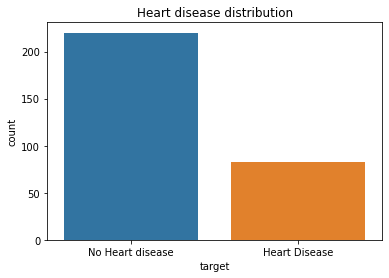

In [ ]:
import seaborn as sns

f = sns.countplot(x='target', data=dados)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
#plt.xlabel("");

Podemos ver no gráfico acima que a distribuição entre doenças cardíacas positivas e negativas é desbalanceada e isso pode dificultar as coisas para um algoritmo de aprendizado. De qualquer forma, nós só temos esses dados agora para trabalhar. Em seguida, vamos estender a distribuição acima para sexo masculino e feminino.

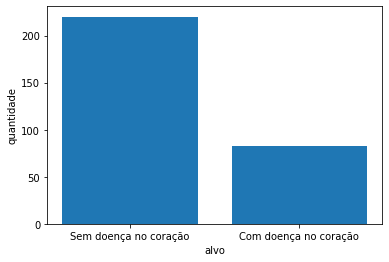

In [ ]:
import matplotlib.pyplot as plt

quantidades = dados['target'].value_counts()
plt.bar(quantidades.index, quantidades.values)
plt.xlabel('alvo')
plt.ylabel("quantidade")
nomes_alvos=['Sem doença no coração', 'Com doença no coração']
plt.xticks([0, 1], nomes_alvos)
plt.show()

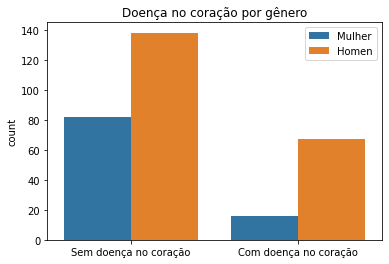

In [ ]:
import matplotlib.pyplot as plt

f = sns.countplot(x='target', data=dados, hue='sex')
plt.legend(['Mulher', 'Homen'])
f.set_title("Doença no coração por gênero")
f.set_xticklabels(['Sem doença no coração', 'Com doença no coração'])
plt.xlabel("");

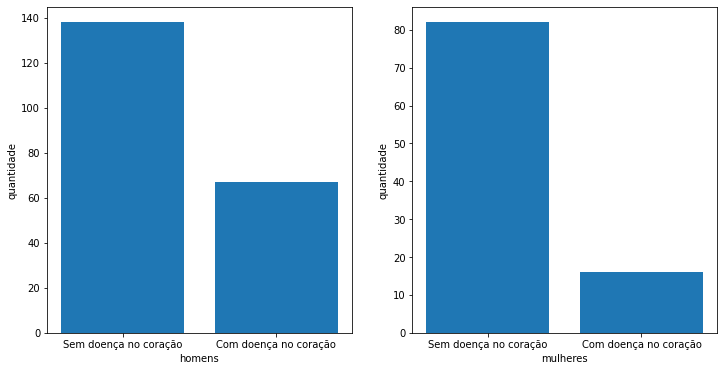

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 6))

quantidades_homens=dados[dados['sex']==1]['target'].value_counts()
quantidades_mulheres=dados[dados['sex']==0]['target'].value_counts()

plt.subplot(1, 2, 1)
plt.bar(quantidades_homens.index, quantidades_homens.values)
plt.xlabel('homens')
plt.ylabel("quantidade")
nomes_alvos=['Sem doença no coração', 'Com doença no coração']
plt.xticks([0, 1], nomes_alvos)

plt.subplot(1, 2, 2)
plt.bar(quantidades_mulheres.index, quantidades_mulheres.values)
plt.xlabel('mulheres')
plt.ylabel("quantidade")
nomes_alvos=['Sem doença no coração', 'Com doença no coração']
plt.xticks([0, 1], nomes_alvos)



plt.show()





Do gráfico acima, podemos ver que o sexo não é uma característica que possa induzir a classificação. Se olharmos outras características veremos o mesmo.

É importante também ter caracteristicas que não sejam reudundantes. Ou seja, que tenham baixa correlação. Assim não faremos nosso modelo trabalhar processar mais que o necessário. Esse conjunto de dados já foi preprocessado e não deve ter caracteristicas com alta correlacao, mas vamos verificar isso.

A matriz de correlação ou mapa de calor é muito útil para destacar as variáveis mais correlacionadas em uma tabela de dados. Neste gráfico, os coeficientes de correlação são coloridos de acordo com o valor: Vamos traçar um mapa de calor da matriz de correlação como abaixo.

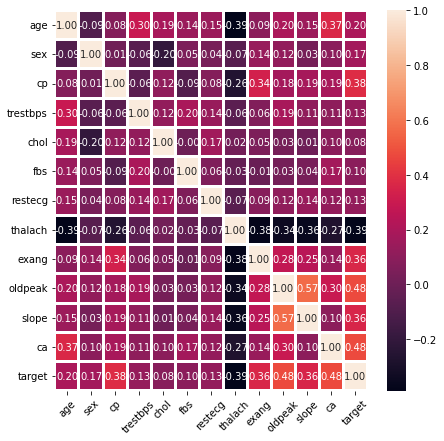

In [ ]:
plt.rcParams["figure.figsize"] = (7,7)
heat_map = sns.heatmap(dados.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);


Como você pode observar, não há uma forte correlação entre nenhuma das 14 características



# Experimentando um classificador SVM como linha de base

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC #support vector classifier
#from sklearn.svm import LinearSVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf.score(X_test,y_test)

0.85

# Experimentando um classificado dummy como linha de base

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.7260726072607261

#rede neural

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
qtd_saida=1; #classificacao binaria
qtd_entrada=len(X[0]);

In [ ]:
print(qtd_saida)
print(qtd_entrada)

1
13


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.9338399 ,  0.69141072, -2.05403599, ...,  2.28495852,
        -0.72970605, -2.27760043],
       [ 1.3782113 ,  0.69141072,  0.86790253, ...,  0.66354767,
         2.47465531, -0.55662055],
       [ 1.3782113 ,  0.69141072,  0.86790253, ...,  0.66354767,
         1.40653485,  1.16435932],
       ...,
       [ 1.1560256 ,  0.69141072,  0.86790253, ...,  0.66354767,
         0.3384144 ,  1.16435932],
       [-0.73255285,  0.69141072,  0.86790253, ..., -0.95786317,
         1.40653485,  1.16435932],
       [ 0.9338399 , -1.44631834,  0.86790253, ...,  0.66354767,
         2.47465531,  1.16435932]])

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [ ]:
#X = np.asarray(X).astype('float32')

In [ ]:
X_train_scaled.shape

(203, 13)

In [ ]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.SGD(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])
modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='auto')
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='auto')

#historico = modelo.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=8, callbacks = [early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 0.7822 - accuracy: 0.4483
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 0.7636 - accuracy: 0.4581
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7467 - accuracy: 0.4532
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.7311 - accuracy: 0.4926
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 

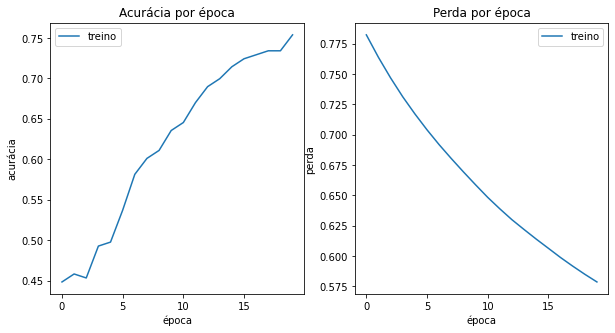

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino'])

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 5ms/step - loss: 0.5891 - accuracy: 0.6900
Perda do teste: 0.5890772938728333
Acurácia do teste: 0.6899999976158142


#Revisando o modelo de diagnóstico


## mais neuronios e camadas

In [ ]:
modelo = keras.Sequential(name='modelo1')
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.SGD(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])


modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32)




Model: "modelo1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 13)                182       
                                                                 
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 0.7013 - accuracy: 0.5813
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.6010
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5911
Epoch 4/20
7/7 [=====================

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 5ms/step - loss: 0.5594 - accuracy: 0.7500
Perda do teste: 0.5594236254692078
Acurácia do teste: 0.75


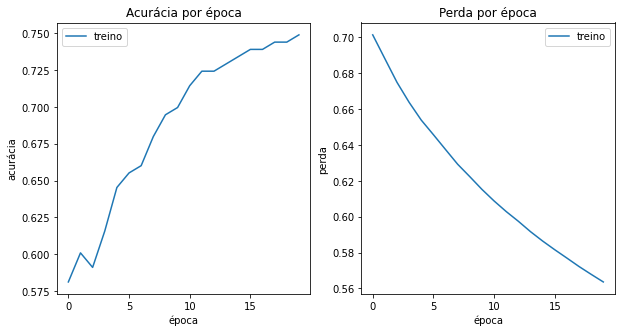

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino'])

## variando a taxa de aprendizado

In [ ]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(13))

modelo.add(keras.layers.Dense(13, activation='relu'))

#modelo.add(keras.layers.Dense(13, activation='relu'))

modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.SGD(learning_rate=1),               
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 13)                182       
                                                                 
 dense_6 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.7635
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.8325
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.8424
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8473
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - los

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.8200
Perda do teste: 0.47049862146377563
Acurácia do teste: 0.8199999928474426


 a diferença entre a acurácia de treino e teste está bem grande

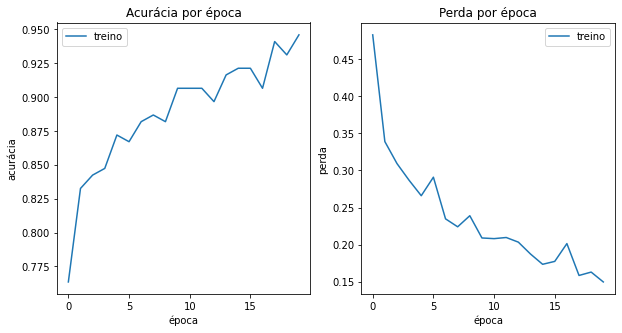

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino'])

In [ ]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(13))

modelo.add(keras.layers.Dense(13, activation='relu'))

#modelo.add(keras.layers.Dense(13, activation='relu'))

modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.SGD(learning_rate=0.001),               
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 13)                182       
                                                                 
 dense_8 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.6256
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.6256
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.6256
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6305
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.6700
Perda do teste: 0.6342647075653076
Acurácia do teste: 0.6700000166893005


##outro otimizador

In [ ]:
modelo = keras.Sequential(name='modelo1')
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(13, activation='relu'))
#modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32)



Model: "modelo1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 13)                182       
                                                                 
 dense_10 (Dense)            (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 2s 5ms/step - loss: 0.6699 - accuracy: 0.6059
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6287 - accuracy: 0.6552
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6025 - accuracy: 0.6798
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.6897
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 4ms/step - loss: 0.3941 - accuracy: 0.8400
Perda do teste: 0.39406144618988037
Acurácia do teste: 0.8399999737739563


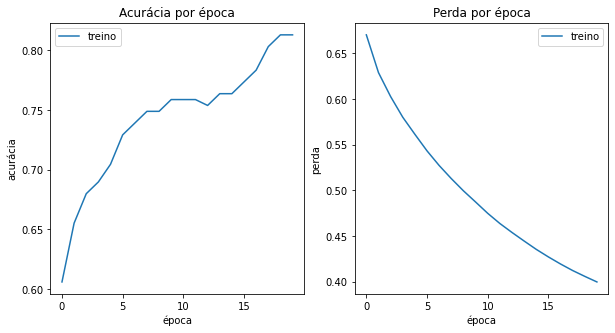

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino'])

##deep learning na verdade usa mais camadas

In [ ]:
modelo = keras.Sequential(name='modelo1')
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32)

Model: "modelo1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 13)                182       
                                                                 
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 1)                 14        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 0.7255 - accuracy: 0.5468
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5616
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.6656 - accuracy: 0.6059
Epoch 4/20
7/7 [=====================

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 4ms/step - loss: 0.3905 - accuracy: 0.8800
Perda do teste: 0.39047136902809143
Acurácia do teste: 0.8799999952316284


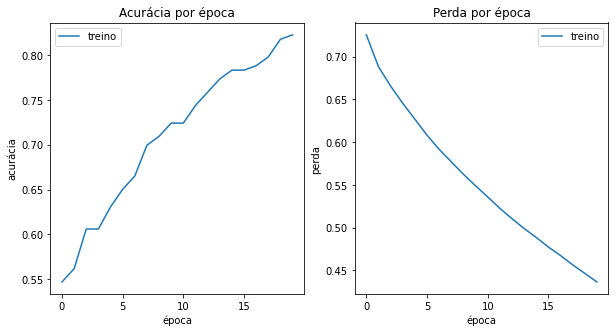

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino'])

##muita variacao entre a acuracia de treino e de teste

In [ ]:
modelo = keras.Sequential(name='modelo1')
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(13, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

Model: "modelo1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 13)                182       
                                                                 
 dense_15 (Dense)            (None, 13)                182       
                                                                 
 dense_16 (Dense)            (None, 1)                 14        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 35ms/step - loss: 0.7357 - accuracy: 0.3642 - val_loss: 0.6913 - val_accuracy: 0.4634
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6869 - accuracy: 0.5062 - val_loss: 0.6628 - val_accuracy: 0.6585
Epoch 3/20
6/6 [==============================] 

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8100
Perda do teste: 0.42756107449531555
Acurácia do teste: 0.8100000023841858


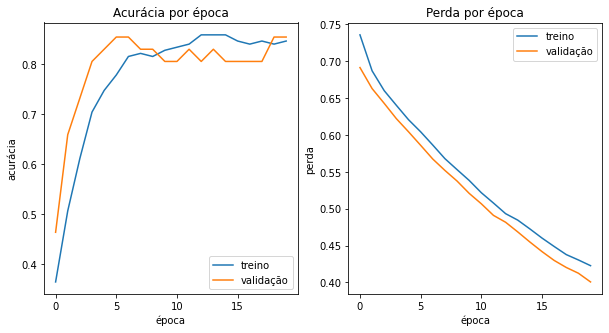

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

#experimentos com overfitting

In [ ]:
modelo = keras.Sequential(name='modelo1')
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(130, activation='relu'))
modelo.add(keras.layers.Dense(130, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(

               optimizer=keras.optimizers.RMSprop(),

               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])


modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, batch_size=32)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='auto')
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='auto')

#historico = modelo.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=8, callbacks = [early_stopping])

Model: "modelo1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 130)               1820      
                                                                 
 dense_18 (Dense)            (None, 130)               17030     
                                                                 
 dense_19 (Dense)            (None, 1)                 131       
                                                                 
Total params: 18,981
Trainable params: 18,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 34ms/step - loss: 0.6120 - accuracy: 0.6790 - val_loss: 0.5055 - val_accuracy: 0.7561
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.4564 - accuracy: 0.7778 - val_loss: 0.4254 - val_accuracy: 0.8780
Epoch 3/20
6/6 [==========================

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8400
Perda do teste: 0.3807624876499176
Acurácia do teste: 0.8399999737739563


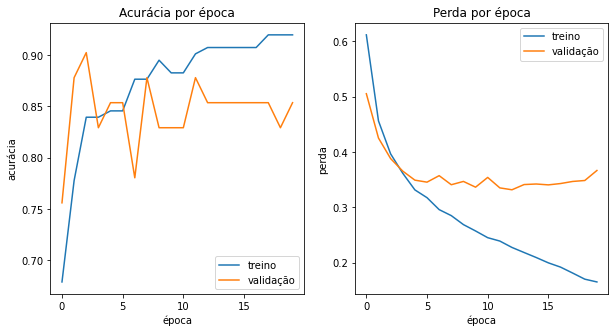

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
modelo = keras.Sequential(name='modelo1')
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(260, activation='relu'))
modelo.add(keras.layers.Dense(260, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               #optimizer='adam', 
               optimizer=keras.optimizers.RMSprop(),
               #optimizer=keras.optimizers.Adam(),
               #loss='sparse_categorical_crossentropy',
               #loss='categorical_crossentropy',
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])
               #metrics=[keras.metrics.binary_accuracy])
               #metrics=[keras.metrics.AUC(from_logits=True)])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, batch_size=32)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='auto')
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='auto')

#historico = modelo.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=8, callbacks = [early_stopping])

Model: "modelo1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 260)               3640      
                                                                 
 dense_21 (Dense)            (None, 260)               67860     
                                                                 
 dense_22 (Dense)            (None, 1)                 261       
                                                                 
Total params: 71,761
Trainable params: 71,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 34ms/step - loss: 0.5337 - accuracy: 0.7284 - val_loss: 0.4085 - val_accuracy: 0.9268
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.3695 - accuracy: 0.8457 - val_loss: 0.3487 - val_accuracy: 0.9268
Epoch 3/20
6/6 [==========================

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.8300
Perda do teste: 0.5034351348876953
Acurácia do teste: 0.8299999833106995


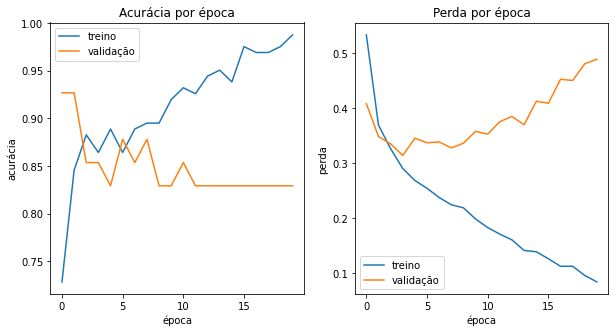

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
modelo = keras.Sequential(name='modelo1')
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(65, activation='relu'))
modelo.add(keras.layers.Dense(65, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2, batch_size=32)

Model: "modelo1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 65)                910       
                                                                 
 dense_24 (Dense)            (None, 65)                4290      
                                                                 
 dense_25 (Dense)            (None, 1)                 66        
                                                                 
Total params: 5,266
Trainable params: 5,266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 34ms/step - loss: 0.6226 - accuracy: 0.6358 - val_loss: 0.5536 - val_accuracy: 0.7805
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.5056 - accuracy: 0.7840 - val_loss: 0.5038 - val_accuracy: 0.8049
Epoch 3/20
6/6 [============================

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8500
Perda do teste: 0.3312731087207794
Acurácia do teste: 0.8500000238418579


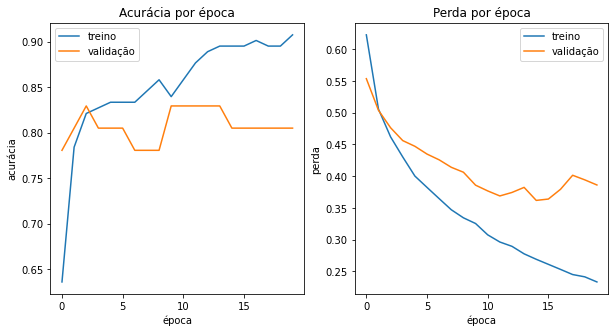

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

#Avaliando modelos de Machine Learning

In [ ]:
y_matriz=np.array([y_train]).T
y_matriz.shape

(203, 1)

In [ ]:
Xy= np.concatenate(
      (X_train_scaled, y_matriz),
      axis=1
  )
Xy.shape

(203, 14)

In [ ]:
k=3
num_amostras_validacao = len(Xy)//k
np.random.shuffle(Xy)

notas_validacao = []

for fold in range(k):
  print(fold)
  dados_validacao = Xy[num_amostras_validacao * fold : num_amostras_validacao * (fold+1)]
  dados_treino = np.concatenate(
      (Xy[:num_amostras_validacao * fold],
      Xy[num_amostras_validacao * (fold+1) :])
  )
  modelo = keras.Sequential()
  modelo.add(keras.layers.Input(13))
  modelo.add(keras.layers.Dense(65, activation='relu'))
  modelo.add(keras.layers.Dense(65, activation='relu'))
  modelo.add(keras.layers.Dense(1,activation='sigmoid'))
  modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])
  modelo.fit(dados_treino[:,:13], dados_treino[:,13:], epochs=20)
  nota_validacao = modelo.evaluate(dados_validacao[:,:13], dados_validacao[:,13:])
  notas_validacao.append(nota_validacao[1])
  
nota_validacao=np.average(notas_validacao)




0
Epoch 1/20
5/5 [==============================] - 1s 3ms/step - loss: 0.6147 - accuracy: 0.7206
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.8162
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.8235
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.4226 - accuracy: 0.8456
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8603
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.3710 - accuracy: 0.8750
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8676
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.8824
Epoch 9/20
5/5 [==============================] - 0s 5ms/step - loss: 0.3171 - accuracy: 0.8676
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 0.3036 - accuracy: 0.8750
Epoch 11/20
5/5 [====================

In [ ]:
notas_validacao

[0.8656716346740723, 0.8059701323509216, 0.8358209133148193]

In [ ]:
nota_validacao

0.8358208934466044

In [ ]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(65, activation='relu'))
modelo.add(keras.layers.Dense(65, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 65)                910       
                                                                 
 dense_36 (Dense)            (None, 65)                4290      
                                                                 
 dense_37 (Dense)            (None, 1)                 66        
                                                                 
Total params: 5,266
Trainable params: 5,266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
7/7 [==============================] - 1s 3ms/step - loss: 0.6337 - accuracy: 0.6552
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7635
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.8079
Epoch 4/20
7/7 [============

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 5ms/step - loss: 0.3299 - accuracy: 0.8700
Perda do teste: 0.3298897445201874
Acurácia do teste: 0.8700000047683716


# Adicionando regularição de pesos

Mas queremos aumentar a generalização, mas ela para de aumentar quando o overfitting ocorre, então precisamos fazer o overfitting ocorrer mais tarde

Uma forma de fazer isso atravez de regularização de pesos, o que faz com que os valores de pesos variem menos, o que faz com que segura o overfitting

In [ ]:
modelo = keras.Sequential()
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(65, activation='relu'))
modelo.add(keras.layers.Dense(65, activation='relu'))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32,validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 65)                910       
                                                                 
 dense_51 (Dense)            (None, 65)                4290      
                                                                 
 dense_52 (Dense)            (None, 1)                 66        
                                                                 
Total params: 5,266
Trainable params: 5,266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 34ms/step - loss: 0.5908 - accuracy: 0.7346 - val_loss: 0.5130 - val_accuracy: 0.7317
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.4892 - accuracy: 0.7778 - val_loss: 0.4702 - val_accuracy: 0.7805
Epoch 3/20
6/6 [======================

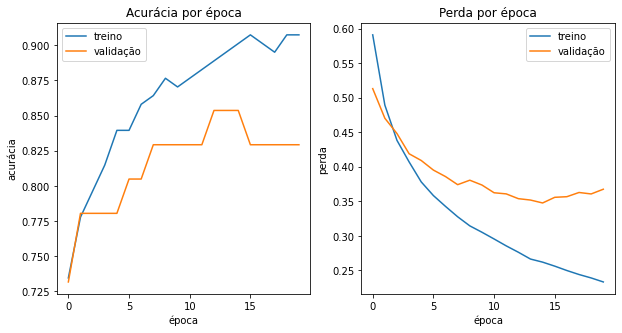

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8300
Perda do teste: 0.3494495749473572
Acurácia do teste: 0.8299999833106995


In [ ]:
from tensorflow.keras import regularizers

modelo = keras.Sequential()
modelo.add(keras.layers.Input(13))
modelo.add(keras.layers.Dense(65, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
modelo.add(keras.layers.Dense(65, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
modelo.add(keras.layers.Dense(1,activation='sigmoid'))

modelo.compile(
               optimizer=keras.optimizers.RMSprop(),
               loss=keras.losses.binary_crossentropy,
               metrics=['accuracy'])

modelo.summary()

historico = modelo.fit(X_train_scaled, y_train, epochs=20, batch_size=32,validation_split=0.2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 65)                910       
                                                                 
 dense_54 (Dense)            (None, 65)                4290      
                                                                 
 dense_55 (Dense)            (None, 1)                 66        
                                                                 
Total params: 5,266
Trainable params: 5,266
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 37ms/step - loss: 0.8324 - accuracy: 0.6543 - val_loss: 0.7268 - val_accuracy: 0.7317
Epoch 2/20
6/6 [==============================] - 0s 8ms/step - loss: 0.7176 - accuracy: 0.7716 - val_loss: 0.6713 - val_accuracy: 0.7805
Epoch 3/20
6/6 [======================

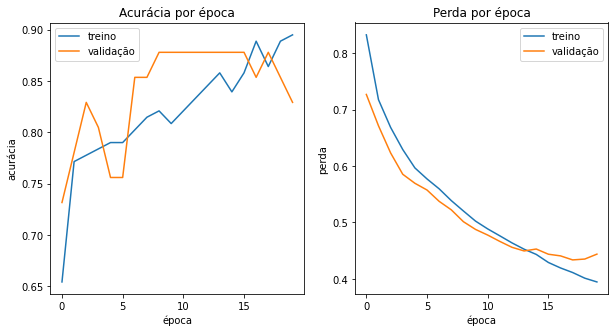

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por época')
plt.xlabel('época')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('época')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(X_test_scaled, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

4/4 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.8600
Perda do teste: 0.4769057035446167
Acurácia do teste: 0.8600000143051147
